### Importing the data

In [1]:
adult <- read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                    sep = ',', fill = F, strip.white = T)
colnames(adult) <- c('age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income')

### Removing redundant columns

In [2]:
adult$education <- NULL
adult$fnlwgt <- NULL
adult$relationship <- NULL

In [3]:
head(adult)

age,workclass,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
37,Private,14,Married-civ-spouse,Exec-managerial,White,Female,0,0,40,United-States,<=50K


### Analyzing each column with the income

In [4]:
# Importing the libraries needed for this
library(ggplot2)
library(plyr)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'plyr' was built under R version 3.6.3"

### Age vs Income

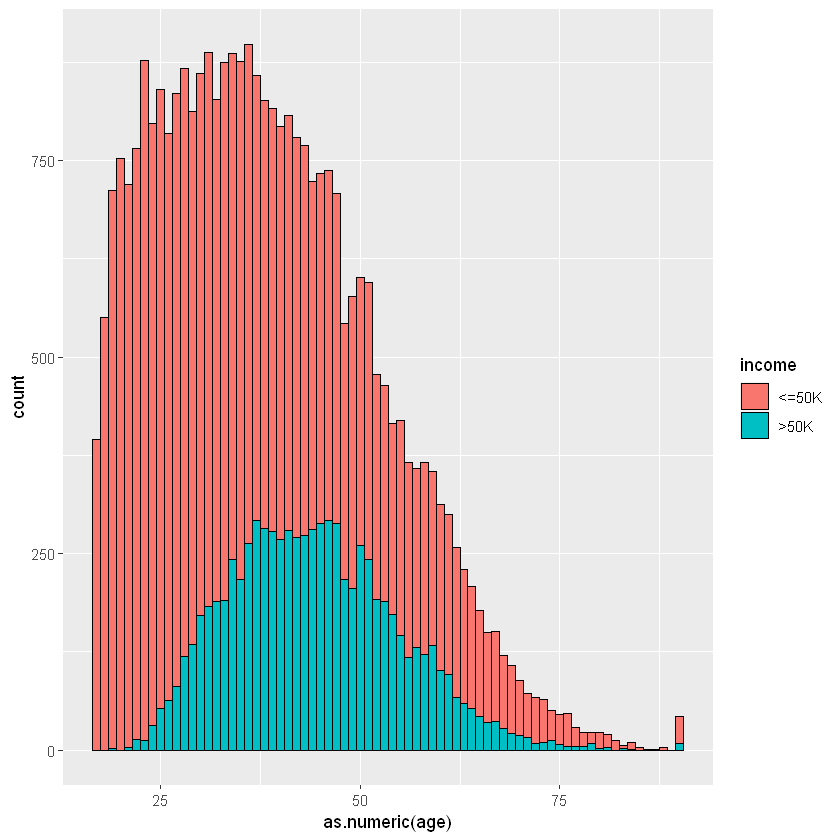

In [5]:
ggplot(adult) + aes(x=as.numeric(age), group=income, fill=income) + 
  geom_histogram(binwidth=1, color='black')

### Gender vs Income

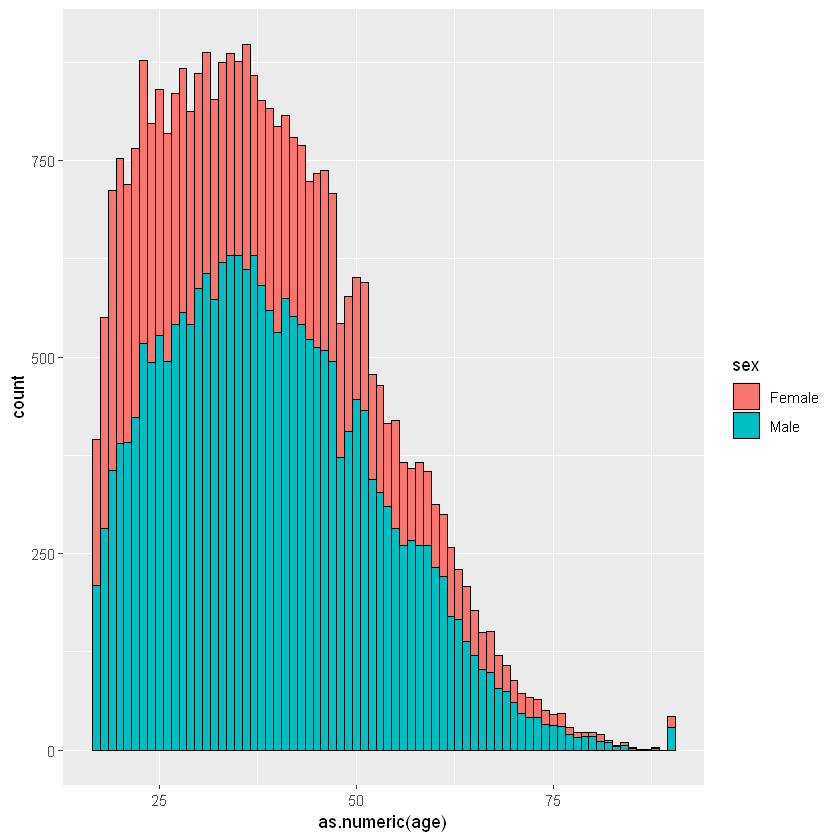

In [6]:
ggplot(adult) + aes(x=as.numeric(age), group=sex, fill=sex) + 
  geom_histogram(binwidth=1, color='black')

### Working Class vs Income

In [7]:
summary(adult$workclass)

?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14

#### What we do next is convert them into 4 main types of classes.

In [8]:
levels(adult$workclass)[1] <- 'Unknown'
# combine into Government job
adult$workclass <- gsub('^Federal-gov', 'Government', adult$workclass)
adult$workclass <- gsub('^Local-gov', 'Government', adult$workclass)
adult$workclass <- gsub('^State-gov', 'Government', adult$workclass) 

# combine into Sele-Employed job
adult$workclass <- gsub('^Self-emp-inc', 'Self-Employed', adult$workclass)
adult$workclass <- gsub('^Self-emp-not-inc', 'Self-Employed', adult$workclass)

# combine into Other/Unknown
adult$workclass <- gsub('^Never-worked', 'Other', adult$workclass)
adult$workclass <- gsub('^Without-pay', 'Other', adult$workclass)
adult$workclass <- gsub('^Other', 'Other/Unknown', adult$workclass)
adult$workclass <- gsub('^Unknown', 'Other/Unknown', adult$workclass)

adult$workclass <- as.factor(adult$workclass)

In [9]:
table(adult$workclass)


   Government Other/Unknown       Private Self-Employed 
         4351          1857         22696          3657 

In [10]:
# barplot of job type by income group
# get the counts by industry and income group
count <- table(adult[adult$workclass == 'Government',]$income)["<=50K"]
count <- c(count, table(adult[adult$workclass == 'Government',]$income)[">50K"])
count <- c(count, table(adult[adult$workclass == 'Other/Unknown',]$income)["<=50K"])
count <- c(count, table(adult[adult$workclass == 'Other/Unknown',]$income)[">50K"])
count <- c(count, table(adult[adult$workclass == 'Private',]$income)["<=50K"])
count <- c(count, table(adult[adult$workclass == 'Private',]$income)[">50K"])
count <- c(count, table(adult[adult$workclass == 'Self-Employed',]$income)["<=50K"])
count <- c(count, table(adult[adult$workclass == 'Self-Employed',]$income)[">50K"])
count <- as.numeric(count)

# create a dataframe
industry <- rep(levels(adult$workclass), each = 2)
income <- rep(c('<=50K', '>50K'), 4)
df <- data.frame(industry, income, count)
df

industry,income,count
Government,<=50K,3010
Government,>50K,1341
Other/Unknown,<=50K,1666
Other/Unknown,>50K,191
Private,<=50K,17733
Private,>50K,4963
Self-Employed,<=50K,2311
Self-Employed,>50K,1346


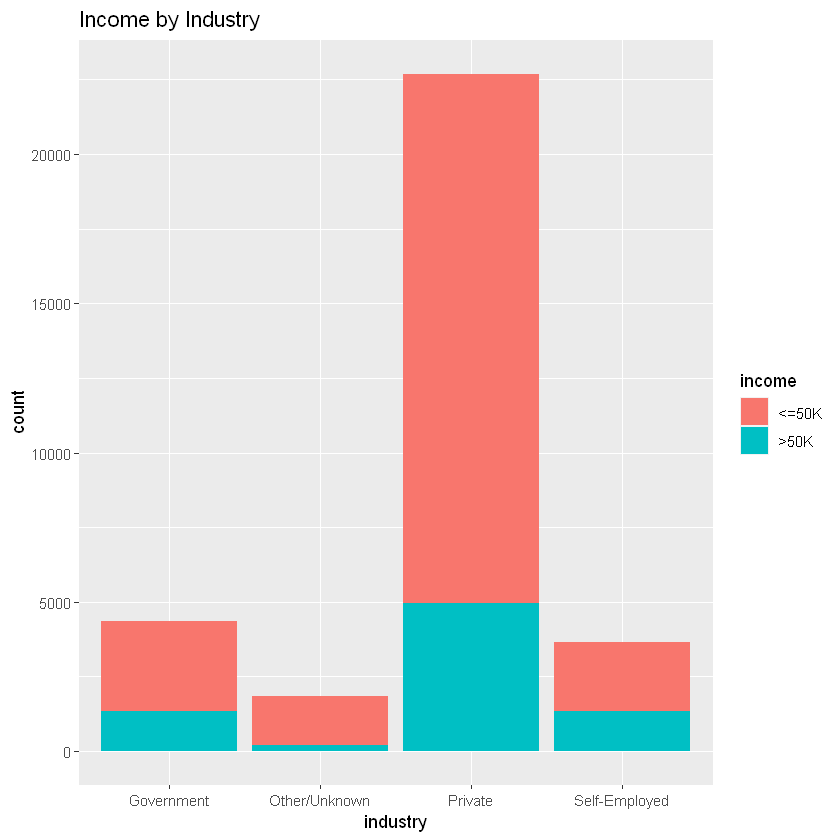

In [11]:
# calculate the percentages
df <- ddply(df, .(industry), transform, percent = count/sum(count) * 100)

# bar plot of counts by industry with in group proportions 
ggplot(df, aes(x = industry, y = count, fill = income)) +
  geom_bar(stat="identity") +
  ggtitle('Income by Industry')

### Income vs Number of years of Education

In [12]:
# create a dataframe
df1 <- data.frame(table(adult$income, adult$education_num))
names(df1) <- c('income', 'education_num', 'count')
df1

income,education_num,count
<=50K,1,51
>50K,1,0
<=50K,2,162
>50K,2,6
<=50K,3,317
>50K,3,16
<=50K,4,606
>50K,4,40
<=50K,5,487
>50K,5,27


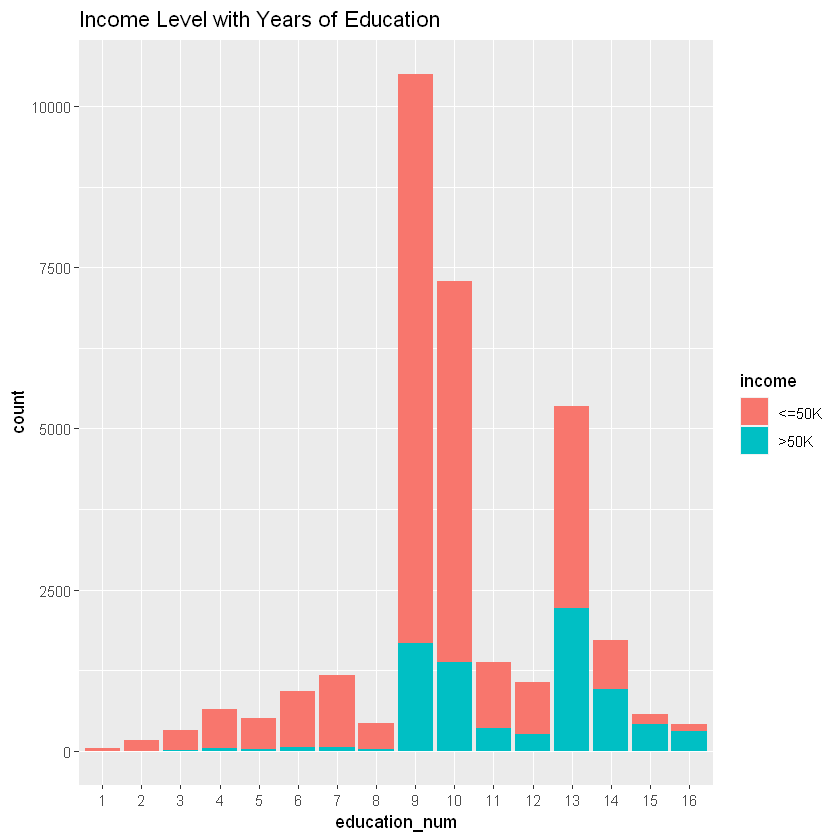

In [13]:
# calculate the percentages
df1 <- ddply(df1, .(education_num), transform, percent = count/sum(count) * 100)


# bar plot of counts by years of education with in group proportions 
ggplot(df1, aes(x = education_num, y = count, fill = income)) +
  geom_bar(stat = "identity") +
  ggtitle('Income Level with Years of Education')

### Income based on class of Occupation

In [14]:
table(adult$occupation)


                ?      Adm-clerical      Armed-Forces      Craft-repair 
             1843              3770                 9              4099 
  Exec-managerial   Farming-fishing Handlers-cleaners Machine-op-inspct 
             4066               994              1370              2002 
    Other-service   Priv-house-serv    Prof-specialty   Protective-serv 
             3295               149              4140               649 
            Sales      Tech-support  Transport-moving 
             3650               928              1597 

#### Combining the occupation classes in Blue-collar, professional, sales, service and white collar.

In [15]:
levels(adult$occupation)[1] <- 'Unknown'
adult$occupation <- gsub('Adm-clerical', 'White-Collar', adult$occupation)
adult$occupation <- gsub('Craft-repair', 'Blue-Collar', adult$occupation)
adult$occupation <- gsub('Exec-managerial', 'White-Collar', adult$occupation)
adult$occupation <- gsub('Farming-fishing', 'Blue-Collar', adult$occupation)
adult$occupation <- gsub('Handlers-cleaners', 'Blue-Collar', adult$occupation)
adult$occupation <- gsub('Machine-op-inspct', 'Blue-Collar', adult$occupation)
adult$occupation <- gsub('Other-service', 'Service', adult$occupation)
adult$occupation <- gsub('Priv-house-serv', 'Service', adult$occupation)
adult$occupation <- gsub('Prof-specialty', 'Professional', adult$occupation)
adult$occupation <- gsub('Protective-serv', 'Service', adult$occupation)
adult$occupation <- gsub('Tech-support', 'Service', adult$occupation)
adult$occupation <- gsub('Transport-moving', 'Blue-Collar', adult$occupation)
adult$occupation <- gsub('Unknown', 'Other/Unknown', adult$occupation)
adult$occupation <- gsub('Armed-Forces', 'Other/Unknown', adult$occupation)
adult$occupation <- as.factor(adult$occupation)
summary(adult$occupation)

Blue-Collar Other/Unknown  Professional         Sales       Service 
        10062          1852          4140          3650          5021 
 White-Collar 
         7836

In [16]:
# create a dataframe
df2 <- data.frame(table(adult$income, adult$occupation))
names(df2) <- c('income', 'occupation', 'count')
df2

income,occupation,count
<=50K,Blue-Collar,8362
>50K,Blue-Collar,1700
<=50K,Other/Unknown,1660
>50K,Other/Unknown,192
<=50K,Professional,2281
>50K,Professional,1859
<=50K,Sales,2667
>50K,Sales,983
<=50K,Service,4389
>50K,Service,632


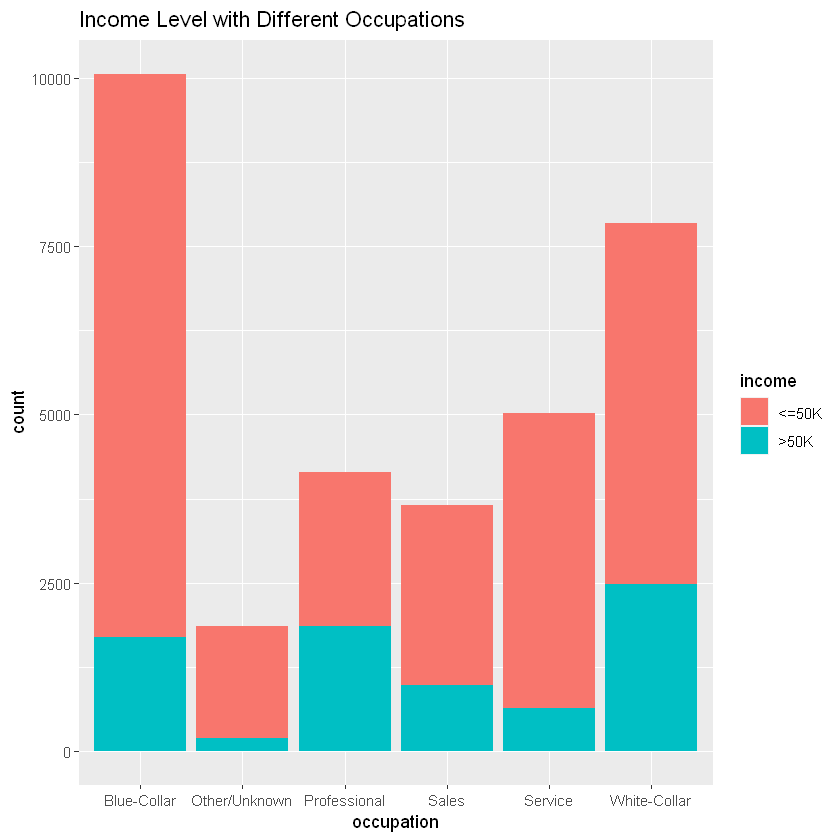

In [17]:
# calculate the percentages
df2 <- ddply(df2, .(occupation), transform, percent = count/sum(count) * 100)

# bar plot of counts by occupation with in group proportions 
ggplot(df2, aes(x = occupation, y = count, fill = income)) +
  geom_bar(stat = "identity") +
  ggtitle('Income Level with Different Occupations')

### Income vs Marital Status

In [18]:
summary(adult$marital_status)

Divorced     Married-AF-spouse    Married-civ-spouse 
                 4443                    23                 14976 
Married-spouse-absent         Never-married             Separated 
                  418                 10683                  1025 
              Widowed 
                  993

In [19]:
adult$marital_status <- gsub('Married-AF-spouse', 'Married', adult$marital_status)
adult$marital_status <- gsub('Married-civ-spouse', 'Married', adult$marital_status)
adult$marital_status <- gsub('Married-spouse-absent', 'Married', adult$marital_status)
adult$marital_status <- gsub('Never-married', 'Single', adult$marital_status)
adult$marital_status <- as.factor(adult$marital_status)
summary(adult$marital_status)

Divorced   Married Separated    Single   Widowed 
     4443     15417      1025     10683       993

In [20]:
df3 <- data.frame(table(adult$income, adult$marital_status))
names(df3) <- c('income', 'marital_status', 'count')
df3

income,marital_status,count
<=50K,Divorced,3980
>50K,Divorced,463
<=50K,Married,8681
>50K,Married,6736
<=50K,Separated,959
>50K,Separated,66
<=50K,Single,10192
>50K,Single,491
<=50K,Widowed,908
>50K,Widowed,85


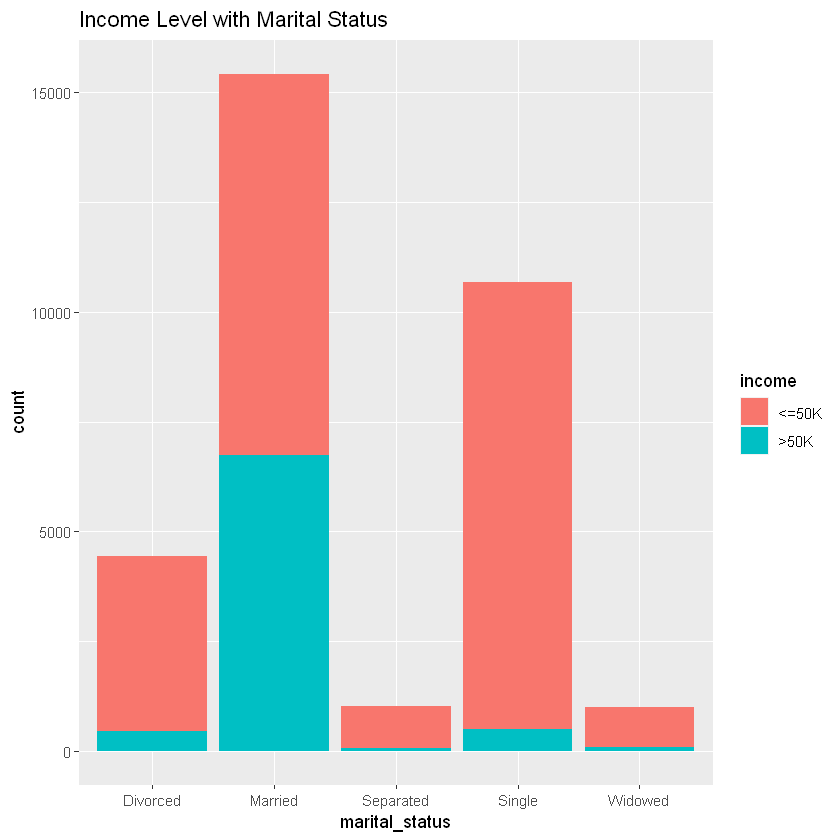

In [21]:
# calculate the percentages
df3 <- ddply(df3, .(marital_status), transform, percent = count/sum(count) * 100)

# bar plot of counts by marital status with in group proportions 
ggplot(df3, aes(x = marital_status, y = count, fill = income)) +
  geom_bar(stat = "identity") + 
  ggtitle('Income Level with Marital Status')